<a href="https://colab.research.google.com/github/whyeon92/ESAA_OB/blob/Code_Study/ESAA_HW1018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 9.1 추천 시스템의 개요와 배경

**[추천 시스템의 개요]**

 사용자의 취향을 이해, 맞춤 상품과 콘텐츠를 제공해 고객 유지를 목표로 추천 시스템을 사용하는 경우가 많아짐에 따라 추천 시스템이 많이 사용되는 중이다!
  → 추천 시스템 고도화를 통해 더 좋은 서비스를 제공 가능하다~!

**[추천 시스템 유형]**

- 콘텐츠 기반 필터링 (Content based Filtering)
- 협업 필터링 (Collaborative Filtering)
 - 최근점 이웃 협업 필터링
 - 잠재 요인 협업 필터링

위의 두 가지 방법으로 나뉘지만 분야에 따라 둘을 결합한 하이브리드 형식도 사용 가능

# 9.2 콘텐츠 기반 필터링 추천 시스템

: 사용자가 특정한 아이템을 매우 선호할 때 그 아이템과 비슷한 콘텐츠를 가진 다른 아이템을 추천

ex) 영화 추천  
→ 영화의 장르, 감독, 배우 등 영화에 들어있는 콘텐츠를 참고해서 추천하는 것

# 9.3 최근접 이웃 협업 필터링

**[협업 필터링]**  
 : 사용자가 아이템에 매긴 평점 정보나 상품 구매 이력과 같은 이력과 같은 사용자 행동 양식만을 기반으로 추천  
 목표 : 사용자가 아직 사용하지 않은 아이템을 예측/평가하는 것!  

**[최근접 이웃 협업 필터링]**

- 사용자 기반 (User-User) : 당신과 비슷한 고객들이 다음 상품도 구매했습니다.

 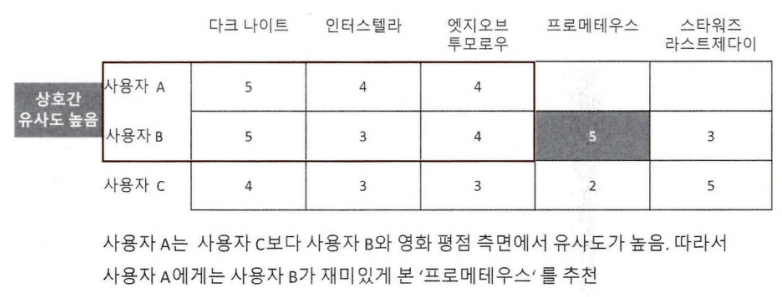   
- 아이템 기반 (Item-Item) : 이 상품을 선택한 다른 고객들은 다음 상품도 구매했습니다.
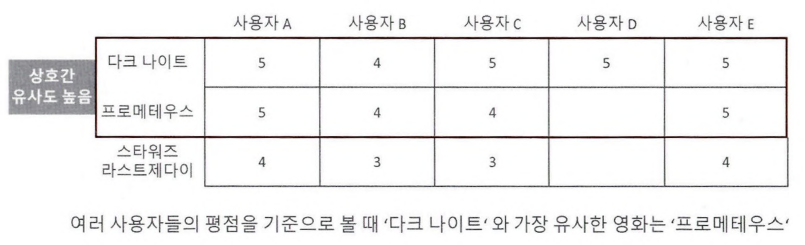   
→ 위와 같은 생각을 기반으로 추천을 수행  

# 9.4 잠재 요인 협업 필터링

In [1]:
import numpy as np

#원본 행렬 R 생성, 분해 행렬 P와 Q 초기화, 잠재요인 차원 K는 3으로 설정
R = np.array([[4, np.NaN, np.NaN, 2, np.NaN],
              [np.NaN, 5, np.NaN, 3, 1],
              [np.NaN, np.NaN, 3, 4, 4],
              [5, 2, 1, 2, np.NaN]])
num_users, num_items = R.shape
K=3

#P와 Q 행렬의 크기를 지정하고 정규 분포를 가진 임의의 값으로 입력합니다.
np.random.seed(1)
P = np.random.normal(scale=1./K, size = (num_users, K))
Q = np.random.normal(scale=1./K, size = (num_items, K))

In [2]:
from sklearn.metrics import mean_squared_error

def get_rmse(R, P, Q, non_zeros):
    error = 0
    #두 개의 분해된 행렬 P와 Q.T의 내적으로 예측 R 행렬 생성
    full_pred_matrix = np.dot(P, Q.T)

    #실제 R 행렬에서 널이 아닌 값의 위치 인덱스 추출해 실제 R 행렬과 예측 행렬의 RMSE 추출
    x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
    y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
    R_non_zeros = R[x_non_zero_ind, y_non_zero_ind]
    full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind]
    mse = mean_squared_error(R_non_zeros, full_pred_matrix_non_zeros)
    rmse = np.sqrt(mse)

    return rmse

In [3]:
#R > 0 인 행 위치, 열 위치, 값을 non_zeros 리스트에 저장.
non_zeros = [(i, j, R[i,j]) for i in range(num_users) for j in range(num_items) if R[i,j] > 0]

steps=1000
learning_rate=0.01
r_lambda=0.01

#SGD 기법으로 P와 Q 매트릭스를 계속 업데이트
for step in range(steps):
    for i, j, r in non_zeros:
        #실제 값과 예측 값의 차이인 오류 값 구함
        eij = r - np.dot(P[i, :], Q[j, :].T)
        #Regularization을 반영한 SGD 업데이트 공식 적용
        P[i,:] = P[i,:] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:])
        Q[j,:] = Q[j,:] + learning_rate*(eij * P[i, :] - r_lambda*Q[j,:])

    rmse = get_rmse(R, P, Q, non_zeros)
    if (step % 50) == 0 :
        print("### iteration step : ", step," rmse : ", rmse)

### iteration step :  0  rmse :  3.2388050277987723
### iteration step :  50  rmse :  0.4876723101369648
### iteration step :  100  rmse :  0.1564340384819247
### iteration step :  150  rmse :  0.07455141311978046
### iteration step :  200  rmse :  0.04325226798579314
### iteration step :  250  rmse :  0.029248328780878973
### iteration step :  300  rmse :  0.022621116143829466
### iteration step :  350  rmse :  0.019493636196525135
### iteration step :  400  rmse :  0.018022719092132704
### iteration step :  450  rmse :  0.01731968595344266
### iteration step :  500  rmse :  0.016973657887570753
### iteration step :  550  rmse :  0.016796804595895633
### iteration step :  600  rmse :  0.01670132290188466
### iteration step :  650  rmse :  0.01664473691247669
### iteration step :  700  rmse :  0.016605910068210026
### iteration step :  750  rmse :  0.016574200475705
### iteration step :  800  rmse :  0.01654431582921597
### iteration step :  850  rmse :  0.01651375177473524
### iterati

In [4]:
pred_matrix = np.dot(P, Q.T)
print('예측 행렬:\n', np.round(pred_matrix, 3))

예측 행렬:
 [[3.991 0.897 1.306 2.002 1.663]
 [6.696 4.978 0.979 2.981 1.003]
 [6.677 0.391 2.987 3.977 3.986]
 [4.968 2.005 1.006 2.017 1.14 ]]
